In [1]:
from fastai import *
from fastai.text import *

In [2]:
!wget 'https://he-s3.s3.amazonaws.com/media/hackathon/deep-learning-challenge-4/predict-the-energy-used-612632a9-3f496e7f-9da84021/d583b256-d-new_dataset.7z'

--2018-12-04 08:23:17--  https://he-s3.s3.amazonaws.com/media/hackathon/deep-learning-challenge-4/predict-the-energy-used-612632a9-3f496e7f-9da84021/d583b256-d-new_dataset.7z
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.36.44
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.36.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 355228885 (339M) [application/x-7z-compressed]
Saving to: ‘d583b256-d-new_dataset.7z’

d583b256-d-new_data 100%[===================>] 338.77M   857KB/s    in 4m 15s  

2018-12-04 08:27:32 (1.33 MB/s) - ‘d583b256-d-new_dataset.7z’ saved [355228885/355228885]



In [3]:
!7z x hackearth_dataset.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,8 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 355228885 bytes (339 MiB)

Extracting archive: hackearth_dataset.7z
--
Path = hackearth_dataset.7z
Type = 7z
Physical Size = 355228885
Headers Size = 245
Method = LZMA2:24
Solid = +
Blocks = 1

      1% 2 - new_dataset/test.cs                              2% 2 - new_dataset/test.cs                              3% 2 - new_dataset/test.cs                              4% 2 - new_dataset/test.cs                              5% 2 - new_dataset/test.cs                              6% 2 - new_dataset/test.cs                              7% 2 - new_dataset/test.cs                              8% 2 - new_dataset/test.cs                              9% 2 - new_dataset/test.cs                             10% 2 - new_dataset/test.cs               

In [2]:
path = Path('new_dataset')

In [3]:
path.ls()

[PosixPath('new_dataset/data_clas'),
 PosixPath('new_dataset/models'),
 PosixPath('new_dataset/tmp'),
 PosixPath('new_dataset/.ipynb_checkpoints'),
 PosixPath('new_dataset/train_n.csv'),
 PosixPath('new_dataset/test.csv'),
 PosixPath('new_dataset/sample_submission.csv'),
 PosixPath('new_dataset/tmp_lm_1'),
 PosixPath('new_dataset/train.csv'),
 PosixPath('new_dataset/tmp_lm')]

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(path/'train.csv')

In [6]:
df.head()

,id,title,article,tags
0,HE-ece4370,Check requests to server from the application ...,<p>Is there a way to find what sort of request...,flash|http|websocket|communication|wireshark
1,HE-fad0d3b,Using Asc offset and desc in psql,<p>This code produces this</p>\r\r\r\r\n\r\r\r...,sql|postgresql|offset
2,HE-ea00013,What to do when you have much permissions with...,<p>I'm planning to use a binary system to hand...,php|permissions|binary|bit-manipulation
3,HE-df1304d,React remove component from list,"<p>Pretty new to React, coming from knockout</...",reactjs
4,HE-e946f8c,RPC with promises for node.js,<p>Are there any RPC modules which work with p...,javascript|node.js|websocket|rpc|promise


In [7]:
df['article'][0]

'<p>Is there a way to find what sort of requests does a Flash application send to a server?</p>\r\r\r\r\n\r\r\r\r\n<p>I was trying to see what information a client sends to the server using Chrome "inspect element", but it shows me that nothing is going on.</p>\r\r\r\r\n\r\r\r\r\n<p>But for sure the communication is going on. The website I am interesting in is <a href="http://www.chesscube.com/" rel="nofollow">http://www.chesscube.com/</a> and every time you make a move it somehow sends it to a server or may be just to another opponent. In the end of the game - it sends the game to the server for sure. But up till now, all I can see is just few images, being uploaded during the game.</p>\r\r\r\r\n\r\r\r\r\n<p>Thanks for help.</p>\r\r\r\r\n\r\r\r\r\n<p>P.S. I was trying to use wireshark to capture packets and in such a way to see the communication. Here what I was doing:</p>\r\r\r\r\n\r\r\r\r\n<p>Pinging chesscube.com to realize its ip-address: 78.47.2.115\r\r\r\r\nthan I am listening o

In [8]:
df['title'].head()

0    Check requests to server from the application ...
1                    Using Asc offset and desc in psql
2    What to do when you have much permissions with...
3                     React remove component from list
4                        RPC with promises for node.js
Name: title, dtype: object

In [9]:
df.tags

0              flash|http|websocket|communication|wireshark
1                                     sql|postgresql|offset
2                   php|permissions|binary|bit-manipulation
3                                                   reactjs
4                  javascript|node.js|websocket|rpc|promise
5                                                   android
6                                                      java
7                      c++|c|opencl|fractals|newtons-method
8                 visual-studio-2013|web-deployment-project
9                                                   android
10                                             logging|nlog
11                                      regex|download|wget
12                        javascript|performance|highcharts
13           macos|bash|command-line|command-line-arguments
14                     mysql|cakephp|sql-update|cakephp-2.0
15                                     php|html|css|twitter
16                                      

In [6]:
#df_new = df.set_index(df['id'])
#df_new.drop('id', axis=1, inplace=True)
#df_new.drop('tags',axis=1, inplace = True)
#df_new.to_csv(path/'train_n.csv',index=False)

In [6]:
df_new = pd.read_csv(path/'train_n.csv')
df_new.head()

,title,article
0,Check requests to server from the application ...,<p>Is there a way to find what sort of request...
1,Using Asc offset and desc in psql,<p>This code produces this</p>\r\r\r\r\n\r\r\r...
2,What to do when you have much permissions with...,<p>I'm planning to use a binary system to hand...
3,React remove component from list,"<p>Pretty new to React, coming from knockout</..."
4,RPC with promises for node.js,<p>Are there any RPC modules which work with p...


## Language Model

In [7]:
bs = 64 #BatchSize

In [10]:
data_lm = (TextList.from_csv(path,'train_n.csv')
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('tmp_lm_1')

In [8]:
data_lm = TextLMDataBunch.load(path, 'tmp_lm_1', bs=bs)

In [12]:
data_lm.show_batch() #with df_new

idx,text
0,"xxbos xxmaj how to open a text file in c # / winforms / textbox - mad xxmaj editor xxbos xxmaj space shooter , shooting bug xxbos xxmaj using xxmaj facebook data to populate xxmaj wordpress user profile fields xxbos xxunk shows offset but does not synchronize xxbos xxmaj is there any to way to authenticate my .net application against users in google cloud same as like that of azure"
1,crossdomain.xml policy file not found when trying to register to a database server xxbos delete a part of pd . dataframe with xxmaj python xxbos mysql : xxmaj duplicate xxmaj rows xxmaj when xxmaj inner xxmaj joining xxbos xxmaj use program parameters for graph drawing - xxup xxunk + xxbos ionic 2 / 3 : xxmaj how to select tabs dynamically xxbos xxmaj propel filter all rows that have today
2,"the field is too small to accept the amount of data you are attempted to add xxbos getting error "" recompile with -fpic "" xxbos xxmaj add query string to script tag link in asp.net to break xxmaj cache xxbos nhibernate filtering of a simple list xxbos xxmaj how i can know if the xxup ip host a sites or not by xxup php ( xxmaj reverse xxup ip )"
3,"xxmaj statemachine transition logic xxbos xxup wpf rotatetransform datatrigger xxbos xxmaj how to share a java object reference between android components xxbos xxmaj python- xxmaj incomplete xxmaj data ( xxmaj web xxmaj scraping ) xxbos xxmaj check if rsync command ran successful xxbos xxmaj how to stop xxmaj chrome from archiving dropdown selection xxbos r , ggplot , xxmaj aesthetics must be either length 1 or the same as the"
4,a sql server xxup xml column using xquery xxbos xxmaj laravel xxmaj query builder table join xxbos xxmaj chrome + xxmaj content - xxmaj encoding : gzip + xxmaj basic xxmaj auth = xxmaj zipped output xxbos xxmaj setting a custom font for xxmaj monotouch - dialog elements xxbos mysql group data with 2 results per group and order xxbos xxmaj change binding root in xxup vs2010 using xxmaj perforce


In [9]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103, drop_mult=0.3)

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


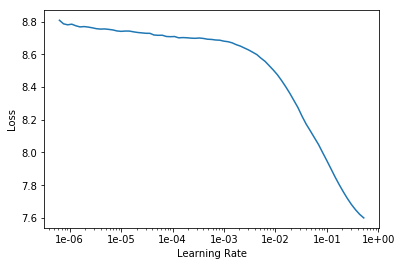

In [10]:
learn.recorder.plot(skip_end=15)

In [11]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.605590,4.456122,0.295857


In [12]:
learn.save('lm_fit')
learn.save_encoder('lm_encoder')

In [13]:
learn.load('lm_fit');

In [14]:
learn.unfreeze()
learn.fit_one_cycle(5,1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.189068,4.114717,0.322957
2,4.090294,4.028592,0.329140
3,3.972421,3.941091,0.336549
4,3.819061,3.874328,0.342937
5,3.678881,3.868387,0.343891


In [15]:
learn.save('lm_ft')
learn.save_encoder('lm_ft_enc')

In [10]:
learn.load('lm_ft');

## Classification Part

In [19]:
data_clas = (TextList.from_csv(path,'train.csv', vocab= data_lm.vocab)
             .random_split_by_pct()
             .label_from_df(cols='tags', sep='|')
             .databunch(bs=bs))
data_clas.save('data_clas')

In [11]:
data_clas = TextClasDataBunch.load(path, 'data_clas', bs=bs)
data_clas.show_batch()

text,target
xxbos xxup he - f1 xxrep 4 4 6,c#;windows-services
xxbos xxup he - xxunk xxrep 4 d 9,brackets;doctrine2;php;symfony;symfony-forms
xxbos xxup he - xxunk xxrep 4 2,for-loop;nested-loops;python;python-2.7
xxbos xxup he - xxunk,child-process;node.js;read-eval-print-loop
xxbos xxup he - xxunk,optimization;sql;sql-server


In [12]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [24]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)
learn.load_encoder('lm_ft_enc')
learn.metrics = [acc_02, f_score]
#learn.load_encoder('lm_encoder')
learn.freeze()

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


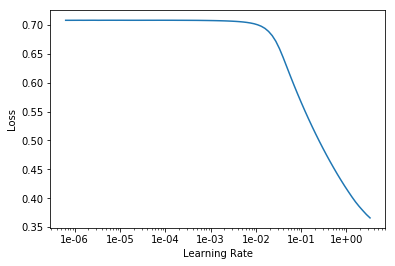

In [26]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(1,1e-1,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta


/opt/anaconda3/lib/python3.7/site-packages/fastai/core.py:210: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  res[x] = 1.


IndexError: too many indices for array

In [ ]:
learn.save('first')

In [ ]:
learn.load('first')